## 导入样本

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False
from keras.datasets import boston_housing
from pandas import Series
import seaborn as sns
(train_data,train_targets),(test_data,test_targets)= boston_housing.load_data()

Using TensorFlow backend.


In [2]:
#查看一些样本维度
print("训练集大小：",train_data.shape)
print("测试集大小：",test_data.shape)

训练集大小： (404, 13)
测试集大小： (102, 13)


训练集有404个样本，每个样本有13个维度

In [3]:
train_data[0]

array([   1.23247,    0.     ,    8.14   ,    0.     ,    0.538  ,
          6.142  ,   91.7    ,    3.9769 ,    4.     ,  307.     ,
         21.     ,  396.9    ,   18.72   ])

我们可以看出数据起伏太大，不利于训练，因此要归一化

## 归一化

In [4]:
mean= train_data.mean(axis=0)
train_data-=mean
std= train_data.std(axis=0)
train_data/=std
test_data-=mean
test_data/=std

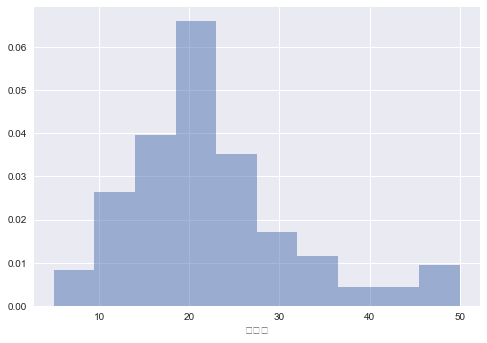

In [5]:
#来看看房价的直方图，直方图用来直观地感受数据的分布
#alpha调节透明度，density表示是否归一化，不归一化纵坐标显示的就是真实频数
r=plt.hist(train_targets,alpha=0.5,normed=True)
plt.xlabel("后三年")

In [6]:


trail= Series(train_targets)

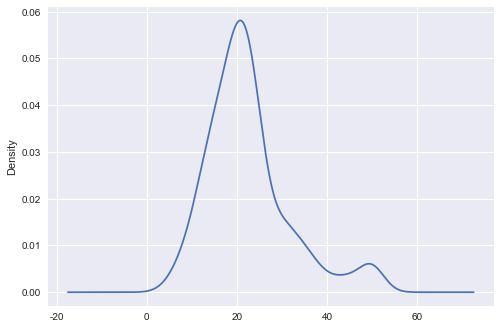

In [7]:
trail.plot(kind="kde")

可惜我不知道怎么把直方图和密度图画到一个图中

In [8]:
#用seaborn来画到同一个图中


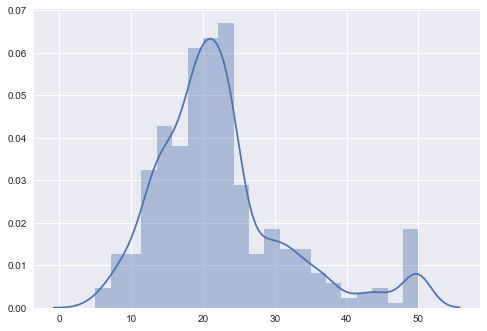

In [9]:
sns.distplot(train_targets)

## 搭建网络

In [8]:
from keras import models
from keras.layers import Dense
def model():
    model= models.Sequential()
    model.add(Dense(32,input_dim=13,activation="relu"))
    model.add(Dense(1))
    model.compile(loss="mse",optimizer="sgd",metrics=["mae"])
    return model

In [9]:
model= model()

In [10]:
history=model.fit(train_data,train_targets,validation_split=0.2,epochs=100,batch_size=64)

Train on 323 samples, validate on 81 samples
Epoch 1/100
323/323 [==============================] - 3s 10ms/step - loss: 375.0205 - mean_absolute_error: 16.7910 - val_loss: 108.8364 - val_mean_absolute_error: 8.1405
Epoch 2/100
323/323 [==============================] - 0s 198us/step - loss: 51.3549 - mean_absolute_error: 5.0007 - val_loss: 33.9102 - val_mean_absolute_error: 4.2350
Epoch 3/100
323/323 [==============================] - 0s 256us/step - loss: 31.1106 - mean_absolute_error: 3.8061 - val_loss: 34.3285 - val_mean_absolute_error: 4.4813
Epoch 4/100
323/323 [==============================] - 0s 158us/step - loss: 22.8557 - mean_absolute_error: 3.1902 - val_loss: 23.2207 - val_mean_absolute_error: 3.3383
Epoch 5/100
323/323 [==============================] - 0s 179us/step - loss: 18.5082 - mean_absolute_error: 2.8933 - val_loss: 19.7080 - val_mean_absolute_error: 3.3582
Epoch 6/100
323/323 [==============================] - 0s 207us/step - loss: 16.5587 - mean_absolute_error: 

323/323 [==============================] - 0s 170us/step - loss: 8.1578 - mean_absolute_error: 1.9210 - val_loss: 40.1747 - val_mean_absolute_error: 4.6669
Epoch 50/100
323/323 [==============================] - 0s 130us/step - loss: 14.1947 - mean_absolute_error: 2.5341 - val_loss: 12.9363 - val_mean_absolute_error: 2.6015
Epoch 51/100
323/323 [==============================] - 0s 157us/step - loss: 7.9303 - mean_absolute_error: 1.9451 - val_loss: 14.0925 - val_mean_absolute_error: 2.9289
Epoch 52/100
323/323 [==============================] - 0s 164us/step - loss: 8.9409 - mean_absolute_error: 2.0665 - val_loss: 13.0751 - val_mean_absolute_error: 2.6728
Epoch 53/100
323/323 [==============================] - 0s 176us/step - loss: 8.5840 - mean_absolute_error: 2.0115 - val_loss: 13.3492 - val_mean_absolute_error: 2.7912
Epoch 54/100
323/323 [==============================] - 0s 167us/step - loss: 9.4266 - mean_absolute_error: 2.1116 - val_loss: 15.9785 - val_mean_absolute_error: 3.187

In [11]:
loss, mae= model.evaluate(test_data,test_targets)

102/102 [==============================] - 0s 264us/step


In [12]:
print("平均绝对值误差为：",mae)

平均绝对值误差为： 3.08232592601


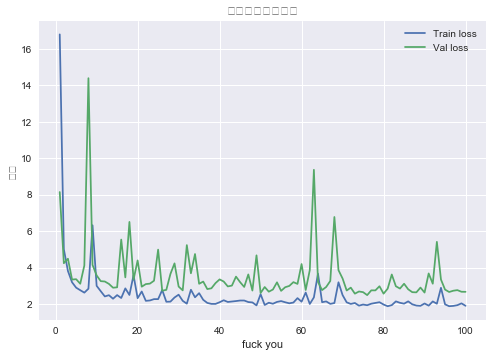

In [13]:
mae_loss= history.history['mean_absolute_error']
val_mae_loss= history.history['val_mean_absolute_error']
plt.plot(range(1,len(mae_loss)+1),mae_loss,label="Train loss")
plt.plot(range(1,len(val_mae_loss)+1),val_mae_loss,label="Val loss")
plt.xlabel("fuck you")
plt.ylabel("损失")
plt.title("训练损失变化过程")
plt.legend()